In [1]:
%matplotlib inline
from citipy import citipy
import json
import csv
import requests
import gmaps
from config import apikey
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import time

In [ ]:
#citypy documentation for ref
#city = citipy.nearest_city(-161.27553690072585, -25.120298028273737)
#city.city_name

In [8]:
#Setting up a random counter of cordinates 
from random import uniform
x, y = uniform(-180,180), uniform(-90, 90)
x, y
list_cities = []

In [9]:
#Loop gathering list of apx 500 cities 

while len(list_cities) <= 575:
    x, y = uniform(-180,180), uniform(-90, 90)
    city = citipy.nearest_city(x, y)
    if city.city_name not in list_cities:
        list_cities.append(city.city_name)
        city = 0
else:
    city = 0
#print(list_cities)

In [10]:
#converting to data frame, and checking for duplicates
cities = pd.DataFrame({"Cities": list_cities})
#cities.Cities.duplicated()
cities.head()

,Cities
0,ushuaia
1,barentsburg
2,narsaq
3,taolanaro
4,dikson


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={apikey}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3bb7b80efb6c69cc146b3fb704a1e9a8&units=imperial&q='

In [12]:
temp = []
lat = []
lon = []
windspd = []
humidity = []
cloudiness = []
new_name = []

for city in cities["Cities"]:
    try:
        resp = requests.get(query_url + city).json()
        print(f"The city name is "+ resp["name"] + " & the city id is " + str(resp["id"]))
        lat.append(resp['coord']['lat'])
        new_name.append(resp["name"])
        lon.append(resp["coord"]["lon"])
        windspd.append(resp["wind"]["speed"])
        humidity.append(resp["main"]["humidity"])
        temp.append(resp["main"]["temp"])
        cloudiness.append(resp["clouds"]["all"])
        time.sleep(1.1)
    except KeyError:
        print("CITY NOT VALID")
        time.sleep(1.1)

The city name is Ushuaia & the city id is 3833367
CITY NOT VALID
The city name is Narsaq & the city id is 3421719
CITY NOT VALID
The city name is Dikson & the city id is 1507390
The city name is Longyearbyen & the city id is 2729907
The city name is Qaanaaq & the city id is 3831208
The city name is Marawi & the city id is 1701054
CITY NOT VALID
The city name is Port Alfred & the city id is 964432
The city name is Busselton & the city id is 2075265
The city name is Albany & the city id is 5106841
The city name is Hermanus & the city id is 3366880
The city name is Altamira & the city id is 3407882
CITY NOT VALID
CITY NOT VALID
The city name is Hobyo & the city id is 57000
The city name is Mandeville & the city id is 3489577
CITY NOT VALID
The city name is Huarmey & the city id is 3939168
The city name is Bredasdorp & the city id is 1015776
The city name is Saint-Philippe & the city id is 935215
The city name is Touros & the city id is 3386213
The city name is Punta Arenas & the city id i

The city name is Ribeira Grande & the city id is 3372707
The city name is Sao Filipe & the city id is 3374210
The city name is Inta & the city id is 1505579
The city name is Sao Gabriel da Cachoeira & the city id is 3662342
The city name is Vestmannaeyjar & the city id is 3412093
The city name is Sept-Iles & the city id is 6144312
The city name is Bathurst & the city id is 2176632
The city name is Nalut & the city id is 2214432
The city name is Roald & the city id is 3141667
The city name is Beyneu & the city id is 610298
The city name is Vestmanna & the city id is 2610343
The city name is Pangody & the city id is 1495626
The city name is Matadi & the city id is 2313002
The city name is La Mana & the city id is 3655117
The city name is Nouadhibou & the city id is 2377457
The city name is Tenenkou & the city id is 2449938
The city name is Iquique & the city id is 3887127
The city name is Praia da Vitoria & the city id is 3372760
The city name is Fort Myers Beach & the city id is 4155996

The city name is Gobabis & the city id is 3357247
The city name is Cavadinesti & the city id is 682511
The city name is Silva Jardim & the city id is 3447591
The city name is Sonqor & the city id is 114049
The city name is Presidente Olegario & the city id is 3452327
The city name is Nantucket & the city id is 4944903
The city name is Saint-Pierre & the city id is 935214
CITY NOT VALID
CITY NOT VALID
The city name is Neuquen & the city id is 3843123
The city name is Neyveli & the city id is 1253080
The city name is Akdepe & the city id is 601551
The city name is Major Isidoro & the city id is 3395880
The city name is Saurimo & the city id is 145531
The city name is Miraflores & the city id is 3761194
The city name is Kabinda & the city id is 215527
The city name is Tabalosos & the city id is 3691638
The city name is Coyhaique & the city id is 3894426
The city name is Menzel Kamel & the city id is 2469255
The city name is Correntina & the city id is 3465373
The city name is Rafai & the 

CITY NOT VALID
CITY NOT VALID
The city name is Portree & the city id is 2640006
The city name is Bumba & the city id is 217745
The city name is Caala & the city id is 3351500
The city name is Muli & the city id is 1337617
The city name is Manta & the city id is 3654410
The city name is Geraldton & the city id is 2070998
The city name is Obo & the city id is 236950
The city name is North Myrtle Beach & the city id is 4589446
The city name is Moroni & the city id is 921772
The city name is Sabratah & the city id is 2212771
The city name is Havre-Saint-Pierre & the city id is 5972291
CITY NOT VALID
The city name is Buraidah & the city id is 107304
CITY NOT VALID
The city name is Gamboula & the city id is 2386756
The city name is Adrar & the city id is 2381972
The city name is Boddam & the city id is 2655288
The city name is Urdoma & the city id is 478769
The city name is Puerto Leguizamo & the city id is 3671437
The city name is Cayenne & the city id is 3382160
The city name is Inhambane 

In [13]:
new_dic = ({"City Name": new_name, "Tempurature": temp, "Latitude": lat, "Longitude": lon, "Wind Spd": windspd, "Humidity %": humidity, "Cloud %": cloudiness})
new_df = pd.DataFrame(new_dic)
new_df.head()

,City Name,Tempurature,Latitude,Longitude,Wind Spd,Humidity %,Cloud %
0,Ushuaia,43.57,-54.80,-68.30,41.38,93,90
1,Narsaq,10.40,60.92,-46.05,9.55,51,62
2,Dikson,-8.95,73.51,80.55,12.17,100,100
3,Longyearbyen,-7.60,78.22,15.64,2.24,83,20
4,Qaanaaq,-13.72,77.48,-69.36,4.76,46,0


Text(0.5, 1.0, 'Tempurature (F) vs. Latitude')

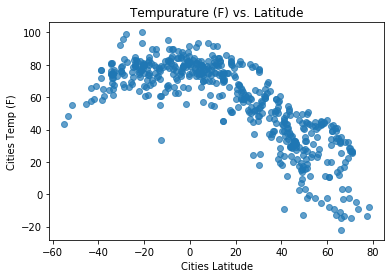

In [14]:
plt.scatter(new_df["Latitude"], new_df["Tempurature"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Temp (F)")
plt.title("Tempurature (F) vs. Latitude")

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

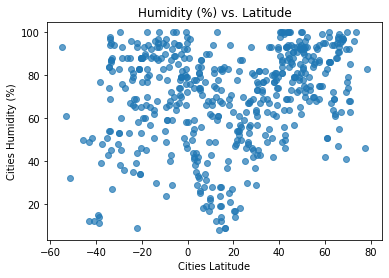

In [15]:
plt.scatter(new_df["Latitude"], new_df["Humidity %"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

Text(0.5, 1.0, 'Couldiness (%) vs. Latitude')

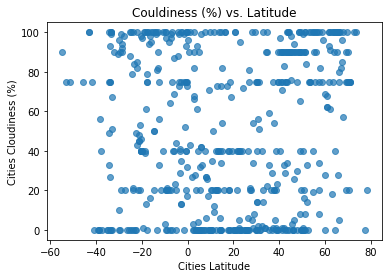

In [16]:
plt.scatter(new_df["Latitude"], new_df["Cloud %"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Cloudiness (%)")
plt.title("Couldiness (%) vs. Latitude")

Text(0.5, 1.0, 'Wind Spd (mph) vs. Latitude')

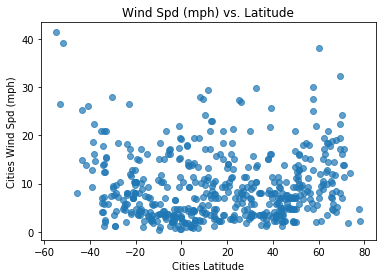

In [17]:
plt.scatter(new_df["Latitude"], new_df["Wind Spd"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Wind Spd (mph)")
plt.title("Wind Spd (mph) vs. Latitude")

In [18]:
#new_df.loc[]
north_hem = new_df.loc[new_df["Latitude"] >= 0, :]
#north_hem
south_hem = new_df.loc[new_df["Latitude"] < 0, :]
south_hem.head()


,City Name,Tempurature,Latitude,Longitude,Wind Spd,Humidity %,Cloud %
0,Ushuaia,43.57,-54.80,-68.30,41.38,93,90
6,Port Alfred,72.00,-33.59,26.89,1.99,95,99
7,Busselton,61.56,-33.65,115.33,13.98,45,0
9,Hermanus,73.99,-34.42,19.23,4.00,84,33
10,Altamira,87.80,-3.20,-52.21,2.24,74,40


-0.8423094563056379


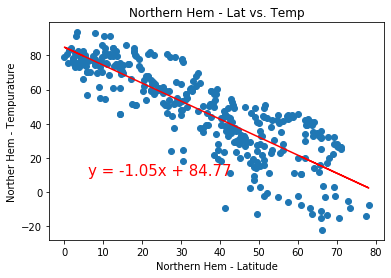

In [28]:
x_values = north_hem['Latitude'].astype('float')
y_values = north_hem['Tempurature'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hem - Latitude")
plt.ylabel("Norther Hem - Tempurature")
plt.title("Northern Hem - Lat vs. Temp")
print(f"{rvalue}")

0.3503654129356217


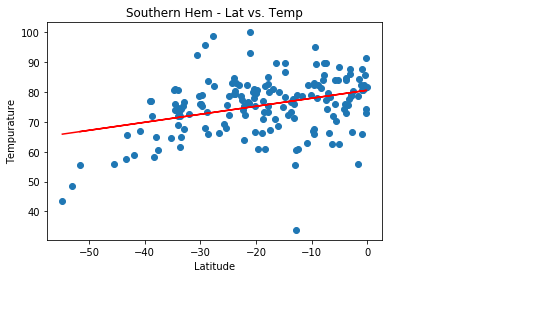

In [29]:
x_values = south_hem['Latitude'].astype('float')
y_values = south_hem['Tempurature'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Tempurature")
plt.title("Southern Hem - Lat vs. Temp")
print(f"{rvalue}")

0.5009849775541773


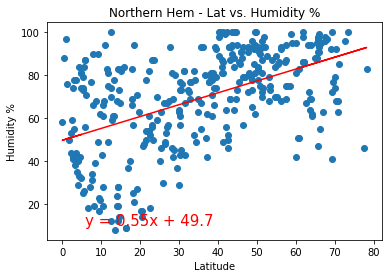

In [30]:
x_values = north_hem['Latitude'].astype('float')
y_values = north_hem['Humidity %'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hem - Lat vs. Humidity %")
print(f"{rvalue}")

0.2948814374522166


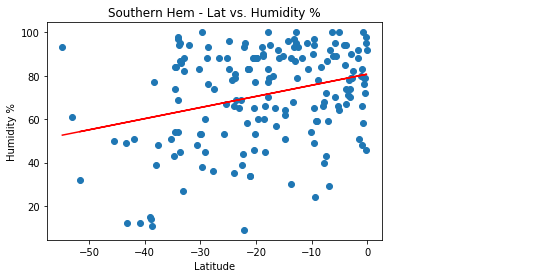

In [31]:
x_values = south_hem['Latitude'].astype('float')
y_values = south_hem['Humidity %'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hem - Lat vs. Humidity %")
print(f"{rvalue}")

0.3629793413318673


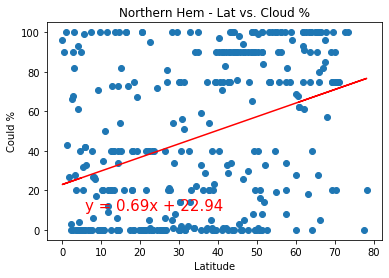

In [33]:
x_values = north_hem['Latitude'].astype('float')
y_values = north_hem['Cloud %'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Could %")
plt.title("Northern Hem - Lat vs. Cloud %")
print(f"{rvalue}")

0.029328728274311336


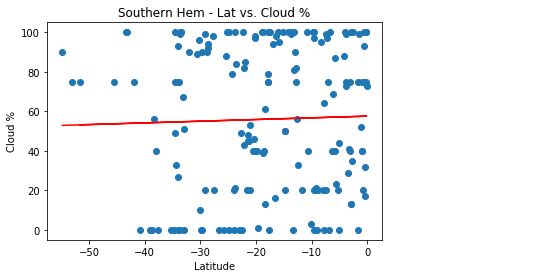

In [34]:
x_values = south_hem['Latitude'].astype('float')
y_values = south_hem['Cloud %'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud %")
plt.title("Southern Hem - Lat vs. Cloud %")
print(f"{rvalue}")

0.15914780258281758


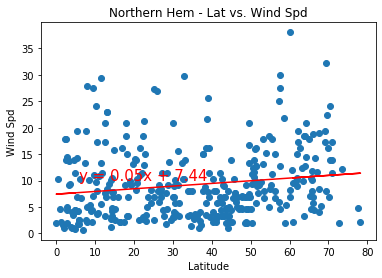

In [35]:
x_values = north_hem['Latitude'].astype('float')
y_values = north_hem['Wind Spd'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Spd")
plt.title("Northern Hem - Lat vs. Wind Spd")
print(f"{rvalue}")

-0.4254489573260296


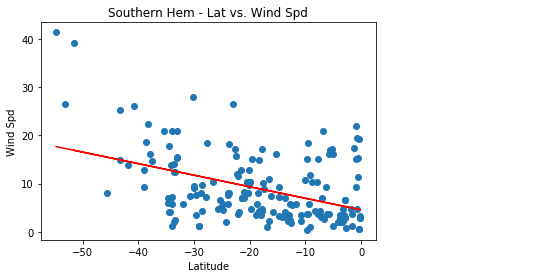

In [36]:
x_values = south_hem['Latitude'].astype('float')
y_values = south_hem['Wind Spd'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Spd")
plt.title("Southern Hem - Lat vs. Wind Spd")
print(f"{rvalue}")

In [38]:
new_df.to_csv('MapData.csv')